# <center> PCA and clustering

  
In this lesson, we will work with unsupervised learning methods such as Principal Component Analysis (PCA) and k-means clustering.

# <center>Samsung Human Activity Recognition

In this task, we will work with the [Samsung Human Activity Recognition] (https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) dataset. The data comes from the accelerometers and gyros of Samsung Galaxy S3 mobile phones ( you can find more info about the features using on the link above), the type of activity of a person with a phone in his pocket is also known - whether he walked, stood, lay, sat or walked up or down the stairs.

We imagine that the type of activity is unknown to us, and we will try to cluster people purely on the basis of available features. 

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
import os

X_train = np.loadtxt(os.path.join("samsung/", "samsung_train.txt"))
y_train = np.loadtxt(os.path.join("samsung/",
                                  "samsung_train_labels.txt")).astype(int)

X_test = np.loadtxt(os.path.join("samsung/", "samsung_test.txt"))
y_test = np.loadtxt(os.path.join("samsung/",
                                  "samsung_test_labels.txt")).astype(int)

In [4]:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])
n_classes = np.unique(y).size
print (f"Number of classes are {n_classes}")

Number of classes are 6


[These labels correspond to:](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)
- 1 - walking
- 2 - going up the stairs
- 3 - going down the stairs
- 4 - sitting
- 5 - standing
- 6 - lying down

[](http://)Scale the sample using `StandardScaler` with default parameters.

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(10299, 561)

There are 10299 instances with 561 features. We next reduce the number of dimensions using PCA, leaving only as many components as necessary to explain at least 90% of the variance of the original (scaled) data. 

(10299, 65)

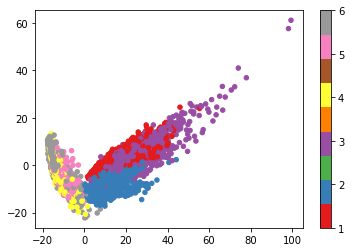

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, random_state=10).fit(X_scaled)
X_pca = pca.transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='Set1');
plt.colorbar()
X_pca.shape

In [7]:
pca.explained_variance_

array([284.66906046,  35.00523109,  15.10675009,  13.76194237,
        10.59795807,   9.15301694,   7.93630205,   6.8236041 ,
         5.52777556,   5.32568727,   4.81555095,   4.54442854,
         4.29690679,   3.79647396,   3.53599881,   3.4545119 ,
         3.34015342,   3.23838116,   3.16115646,   3.03435011,
         2.91090699,   2.82065462,   2.65507517,   2.60227424,
         2.50706305,   2.46790059,   2.33882882,   2.2487546 ,
         2.18290527,   2.13951714,   2.05833908,   2.04424372,
         1.95933981,   1.94537823,   1.88255607,   1.84817245,
         1.81683101,   1.68601446,   1.65092509,   1.62959655,
         1.54719185,   1.51408464,   1.482282  ,   1.44769038,
         1.43086185,   1.39015734,   1.3775991 ,   1.33693869,
         1.32353846,   1.30189148,   1.28122573,   1.22972853,
         1.1929778 ,   1.17341493,   1.14163173,   1.12865486,
         1.11150925,   1.09064125,   1.08008112,   1.06341701,
         1.04582374,   1.02629635,   1.01526441,   0.98

In [8]:
# Keep adding principle components (65 of them) until you reach a variance of ~90%.
# Therefore there are now 65 components to the dataset.
pca.explained_variance_ratio_[:65].sum()

0.9004833346822929

In [9]:
# BEFORE pca
X.shape

(10299, 561)

In [10]:
# AFTER pca
X_pca.shape

(10299, 65)

The above plot shows the visualization of the 6 classes using just the first two principal component features. After applying PCA, we are left with only 65 features that can explain at least 90% of variance in the original data. We will run Kmeans on this data with k = 6 (the number of clusters we expect to see in the data).


In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, n_init=100, 
                random_state=10, n_jobs=1)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

C:\Users\johns\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [12]:
'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_pca, y)
predictions = dt.predict(X_pca)
'''

Visualize the data in the projection on the first two main components. Color the dots according to the clusters received.



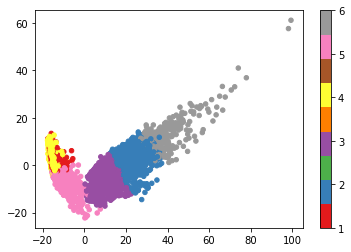

In [18]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels+1, s=20,cmap='Set1');
plt.colorbar()


Look at the correspondence between the cluster labels and the original class labels and what kinds of class labels the KMeans algorithm has high confusion.



In [22]:
import pandas as pd

tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(len(tab.index)-1)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,0,740,904,0,0,78,1722
going up the stairs,0,295,1242,0,2,5,1544
going down the stairs,0,890,320,0,0,196,1406
sitting,1235,0,1,90,451,0,1777
standing,1344,0,0,0,562,0,1906
lying,53,0,5,1556,330,0,1944
all,2632,1925,2472,1646,1345,279,10299


In [24]:
import pandas as pd

tab = pd.crosstab(y, predictions)
tab

col_0,1,2,3,4,5,6
row_0,,,,,,
1,1722,0,0,0,0,0
2,0,1544,0,0,0,0
3,0,0,1406,0,0,0
4,0,0,0,1777,0,0
5,0,0,0,0,1906,0
6,0,0,0,0,0,1944


In [16]:
tab.max(axis=1)

row_0
1    1722
2    1544
3    1406
4    1777
5    1906
6    1944
dtype: int64

In [26]:
max_purity_met = tab.max() / tab.sum()
max_purity_met

col_0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
dtype: float64

This notebook is adaption from the following kaggle notebook https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering and https://www.kaggle.com/kashnitsky/a7-demo-unsupervised-learning-solution